# Assignment 1
### Group 
### Jordan Earle - 12297127
### Martin Frassek - 12236632


## Introduction

While biological systems are often very complex, in many cases formulas are available to model these formulas in a mathematical way. These equations and systems of equations can be utilized to model the biological system on a computer in order to sample and model multiple complex systems quickly. In order to gain a basic understanding of how to do this, three different systems were explored in this work.  

In the first system, the growth of bacteria in a petri dish was examined using a differential equation. The function was integrated and given some initial conditions, the growth constant C was found. Then the time it took for the density to increase to 8 and 10 times the initial value was found.

In the second part of the experiment a data set was given. The data was fit with a linear and an exponential function and the root mean square deviation (RMSD) was found for each of the fits and compared to determine which would lead to the lower error. The differential equations of the functions were then found.  

In the final part of the experiment the SIR model with seasonal forcing was studied in order to see how the parameters controlling the epidemic characteristics affected the system. The parameters investigated were the death rate, recovery rate, season length, initial infection rate, and the initial amount of infected individuals. In order to examine this an interactive plot of the variables was created to explore the different combinations.  

## 1 Bacterial Growth

In this part of the experiment, the growth of bacteria in a petri dish was investigated. The growth of the bacteria is controlled by the following differential equation:

$\frac{\partial{x}}{\partial{t}} = C x$

Where x is the bacteria density and C is the growth constant. In the experiment it is assumed that the initial concentration was 10/ml and that the bacteria density doubles every 20 hours.  In order to find the growth constant the equation first had to be integrated.

Integrating $\frac{\delta x}{\delta t} = C x$ gave $x_{t} = x_0 \cdot e^{C t}$.
We know that $x_{0} = 10$ and $x_{20} = 20$, therefore: $20 = 10 \cdot e^{C \cdot 20} \Leftrightarrow 2 = e^{C \cdot 20} \Leftrightarrow log(2) = C \cdot 20 \Leftrightarrow C = \frac{ln(2)}{20} \Leftrightarrow C = 0.03466$.

Or more generally $C = \frac{log(2)}{D}$ where D is the doubling time.

To calculate when a certain increase from the original number has occurred we can fill in a corresponding multiple of the starting value and solve the formula for $t$: $x_{final} = x_0 \cdot e^{C \cdot t} \Leftrightarrow \frac{x_{final}}{x_0} = e^{C \cdot t} \Leftrightarrow ln(\frac{x_{final}}{x_0}) = C \cdot t \Leftrightarrow t = \frac{ln(\frac{x_{final}}{x_0})}{C}$
In the case of $x_{final} = 80$ this gives $t = 60$ and $x_{final} = 100$ results in $t = 66.4386$.

This is again shown in a calculation in the following block and on the figure following the function is plotted through time. 

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

c = 0.03465735902
ratio = np.arange(8, 11,2)
for r in ratio:
    print(r)
    print("To get " + str(r) + "times the initial value of 10, t should be:" + str(math.log(r)/c))

8
('To get ', 8, 'x initial value of 10, t should be:', 60.00000001384513)
10
('To get ', 10, 'x initial value of 10, t should be:', 66.4385619130781)


In [12]:
time = np.arange(0,101,5)
x = [10*math.exp(t*0.034657) for t in time]

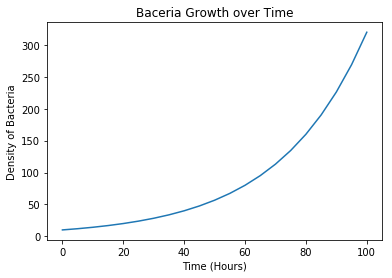

In [13]:
plt.title("Baceria Growth over Time")
plt.xlabel("Time (Hours)")
plt.ylabel("Density of Bacteria")
plt.plot(time, x)

## 2  Fitting linear or exponential to growth data

Often when examining data, it is useful to find the underlying controlling function in order to predict how the system is controlled.  In order to do this, functions are fitted t the data based off assumptions made about the underlying dynamics of the governing equations. In order to determine if the function fits the data, the error is often examined to determine the accuracy of the fit, in addition to other variables such as the complexity.  

In this part of the experiment a data set was given and a linear fit and an exponential fit were applied to the data set and the RMSD was taken in order to determine which fit was better. The resulting functions were plotted and the derivatives were found. 

21
21
(24.978831168831178, -15.92777056277057)
(1.7025883075218307, 1.4153384424892645, 1.48353323690383)


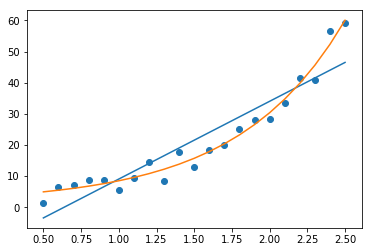

In [14]:
def model_exp(t, A, K, C):
    return A*np.exp(K*t)+C

def fit_exp_nonlin(t, y):
    A = 1
    K = 1
    opt_parms, parm_cov = sp.curve_fit(model_exp, t, y, p0=(A, K, 0))
    A, K, C = opt_parms
    return A, K, C

x_myData = np.arange(0.5, 2.6, 0.1)
y_myData = [1.27,6.58,7.00,8.83,8.66,5.53,9.33,14.57,8.51,17.61,12.94,18.45,19.85,25.03,28.14,28.31,33.41,41.43,40.87,56.71,59.32]
print(len(x_myData))
print(len(y_myData))

plt.scatter(x_myData,y_myData)
m,b = np.polyfit(x_myData, y_myData, 1)
m2,b2 = np.polyfit(np.exp(x_myData), y_myData, 1)
print(m, b)

y_linfit = [x*m+b for x in x_myData]

a, k, c = fit_exp_nonlin(x_myData, y_myData)

y_expfit = [model_exp(x,a,k,c) for x in x_myData]

plt.plot(x_myData, y_linfit)
plt.plot(x_myData, y_expfit)

print(a,k,c)

From the fitting function it can be seen that the equations that would fit the data the best for a linear function and an exponential would be, respectivly:

$y = 24.979x - 15.928$

and

$y = 1.703e^{1.415x}+1.484$ 

In order to determine the average error between the fits the rmse was found.  This can be seen in the next block.

In [15]:
td_l = 0
td_e = 0
for i in range(0,len(y_myData)):
    td_l += np.abs(y_linfit[i]-y_myData[i])*2
    td_e += np.abs(y_expfit[i]-y_myData[i])*2
print("The average error of the linear fit it: ", math.sqrt(td_l))
print("The average error of the exponential fit it: ", math.sqrt(td_e))

('The average error of the linear fit it: ', 14.556060905715842)
('The average error of the exponential fit it: ', 9.534618793173486)


From the figure and the RMSD it can be seen that an exponential function fits the data better. 

Finally the derivatives of the two functions (linear and exponential, respectively) were found to be:

$\frac{\partial{y}}{\partial{x}} = 24.979$

and for the exponential taking the form $y = ae^{bx}+c$ the derivative would be $\frac{\partial{y}}{\partial{x}} = abe^{bx}$ therefor:

$\frac{\partial{y}}{\partial{x}} = 2.410e^{1.415x}$

## 3 The SIR Model - Seasonal Epidemics

When a disease spreads through a population, that population can be subdivided into three classes: Susceptible, infected and recovered individuals (S, I and R). The development of these classes can be described by a system of linear equations, which gives rise to the SIR model.

$\frac{dS}{dt} = \mu - \mu S - \beta (t) I S\\
\frac{dI}{dt} = \beta (t) I S - (\gamma + \mu) I\\
\frac{dR}{dt} = \gamma I - \mu R$

where $\mu$ represents the birth and death rate, $\beta (t)$ is the seasonally dependent infection rate and $\gamma$ stands for the recovery rate of the disease.

The infection rate is described by: 

$\beta (t) = \beta_0(1 + sin(\frac{2\pi t}{T}))$

with $T$ representing the season length and $\beta_0$ indicating the average infection rate.

The reproduction number $R_{num}$ is calculated using the following formula:

$R_{num} = \frac{1}{T}\int_{0}^{T}\frac{\beta (t)}{\mu + \gamma} dt \Leftrightarrow R_{num} = \frac{\beta_0}{\mu + \gamma}$

In [1]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import math
from matplotlib import pyplot as plt


def SIR(mu, beta_0, season_length, gamma, I_0, time):
    print("Reproduction number: "  + str(format(beta_0 / (mu + gamma), ".4f")))
    delta_t = 0.1
    S = 1-I_0
    I = I_0
    R = 0.0
    S_list = []
    I_list = []
    R_list = []
    time_list = []
    for t in range(int(time/delta_t)):
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        time_list.append(t*delta_t)
        S_new = S + (mu - mu * S - beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S) * delta_t
        I_new = I + (beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S - (gamma+mu) * I) * delta_t
        R_new = R + (gamma * I - mu * R) * delta_t
        S, I, R = S_new, I_new, R_new
    plt.figure()
    plt.plot(time_list, S_list, "r", label = "S")
    plt.plot(time_list, I_list, "b", label = "I")
    plt.plot(time_list, R_list, "g", label = "R")
    plt.xlabel("Time")
    plt.ylabel("Fraction of population")
    plt.ylim(bottom = 0, top = 1.05)
    plt.xlim(left = 0, right = time + 1)
    plt.legend(loc = "upper right")
    plt.show()
SIR_interact = interactive(SIR, mu=(0.0, 1.0), beta_0=(0.0, 1.0), 
                           season_length=(0.01, 30.0), gamma=(0.01, 1.0), 
                           I_0=(0.01, 1.0), time =(10, 110))
display(SIR_interact)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtdScsIG1heD0xLjApLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXXigKY=


Although the model is rather simple it already gives rise to interesting behavior. 

Most importantly, it can be observed that the disease can only persist in the population if $R_{num} > 0$ and otherwise dies out. This means, that when $\mu$ or $\gamma$ increase or $\beta_0$ decrease without any of the other variables being changed, it is possible that the disease will go from persisting in the population to dying out. And if the inverse changes occur, a population might go from dying out to persisting in the population.

In cases where the birth and death rate $\mu$ is set to $0$ the simulation quickly reaches an equilibrium., since more recovered individuals accumulated and the pool of susceptibles is being depleted. This leads to a continuous reduced number of newly infecteds until a steady state is reached.(such as mu = 0.0, beta_0 = 0.2, season length = 8.51, gamma = 0.31, I_0 = 3.1 and time = 35)

At higher values for $\mu$, recovered individuals are removed from the system and new susceptibles enter the simulation, which allows for the system to oscillate around a steady state, without ever reaching it.  (such as mu = 0.2, beta_0 = .7, season length = 8.51, gamma = .11, I_0 = 3.1 and time = 35)

The season length, influences the frequency and amplitude of these oscillations. Higher season lengths mean higher amplitudes and lower frequencies.